In [3]:
import config_utils
import file_utils
import mapping
import os
import numpy as np
from calibrations.pedestal.analysis import calculate_pedestal_with_cm

dhc = 'H20'

# dhe = 'H1011'
# path = '/Data2/W53-IF/offsets_delays/2020_10_27_002'

dhe = 'H2042'
path = '/Data2/W56-OB2/offsets_delays/2021_03_18_003'


pedes={}
noises={}
print('reference  noisy pixels')
for i in range(4):

    filename = os.path.join(path, "H20offset_timingscan_asicpair0_all%03d"%i)

    try:
        data = file_utils.read_raw_file(filename, dhe, asicpair= 0,
                                    frames=100, use_header=True, skip_broken_frames=True)[0]
    except Exception as e:
        print(e)


    # mapper = mapping.mapper(module_type='pxd9', module_flavor=module.module_flavor, asicpair=0)
    # prelimPed = np.median(data, axis=2)
    # peds_m[module.dhe] = mapper(prelimPed)
    # print module.dhe, prelimPed.shape, peds_m[module.dhe].shape

#     noise = np.std(data, axis=2)
    drain_mask = np.full(256, False, dtype=np.bool)
    drain_mask[10:16] = True
    result = calculate_pedestal_with_cm(data, drain_mask,threshold=5)
    noise = result['noise']
    
    pedes['all%02d'%i] = np.nanmean(data, axis=2)
    noises['all%02d'%i] = noise

#     print('localdelay%02d, noisy pixels %d.'%(i,len(np.where(noise>2.5)[0])))               
    print('%02d  %d'%(i,len(np.where(noise>2.5)[0])))

print('localdelay  noisy pixels')
for i in range(16):

    filename = os.path.join(path, "H20offset_timingscan_asicpair0_globaldelay-1_localdelay%02d"%i)

    try:
        data = file_utils.read_raw_file(filename, dhe, asicpair= 0,
                                    frames=100, use_header=True, skip_broken_frames=True)[0]
    except Exception as e:
        print(e)

    noise = np.std(data, axis=2)
    
    pedes['delay%02d'%i] = np.nanmean(data, axis=2)
    noises['delay%02d'%i] = noise

#     print('localdelay%02d, noisy pixels %d.'%(i,len(np.where(noise>2.5)[0])))               
    print('%02d  %d'%(i,len(np.where(noise>2.5)[0])))

reference  noisy pixels
00  14
01  35
02  143
03  12
localdelay  noisy pixels
00  15
01  14
02  15
03  16
04  14
05  13
06  13
07  79
08  53
09  30
10  20
11  19
12  13
13  11
14  12
15  15


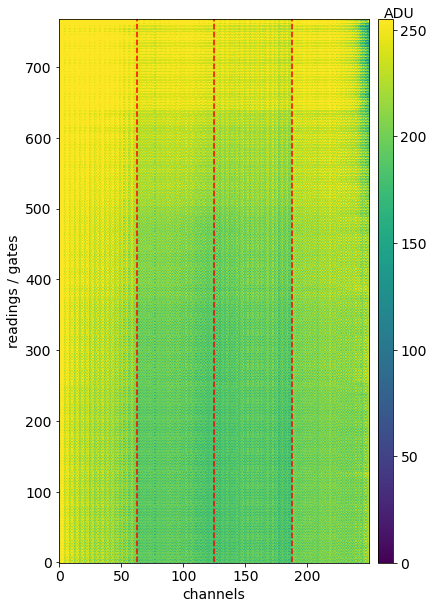

In [20]:
from matplotlib import pyplot as plt
from epics_utils import get_pv
import plots

# module_flavor = get_pv("PXD:B:config-"+dhe,"module_type:VALUE:set").get()
module_flavor = 'if'
mapper = mapping.mapper(module_type='pxd9', module_flavor=module_flavor, asicpair=0)

fig, ax = plt.subplots(figsize=(6, 10))
# ax.imshow(mapper(pedes['delay01']), origin="lower", aspect="auto", vmin=0, vmax=255)

plots.plot_occupancyXY(pedes['all01'], ax, format='pxd9',device='pxd9', module='W53_IF', module_type='if', asicpair=0, vmin=0.0, vmax=255.)